In [48]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows")

In [49]:
import pandas as pd
import seaborn as sns
import numpy as np

In [50]:
dataset = pd.read_csv(f"{path}\imdb_top_1000.csv")

In [51]:
dataset.shape

(1000, 16)

#### Missing values in the dataset

In [52]:
dataset.isna().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [53]:
dataset.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

#### Plotting the missing values in the dataset

<Axes: >

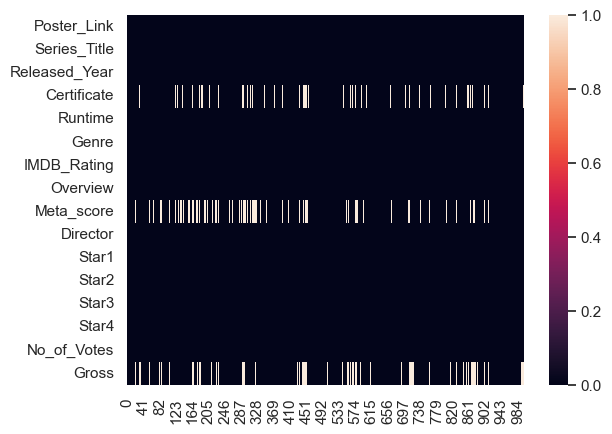

In [54]:
sns.heatmap(dataset.isna().transpose())

In [55]:
dataset["Meta_score"].max()

np.float64(100.0)

In [56]:
dataset[["Certificate","Meta_score","Gross"]]

,Certificate,Meta_score,Gross
0,A,80.0,"28,341,469"
1,A,100.0,"134,966,411"
2,UA,84.0,"534,858,444"
3,A,90.0,"57,300,000"
4,U,96.0,"4,360,000"
...,...,...,...
995,A,76.0,NaN
996,G,84.0,NaN
997,Passed,85.0,"30,500,000"
998,NaN,78.0,NaN


In [57]:
dataset["Series_Title"][dataset["Gross"].isna() & dataset["Meta_score"].isna()]

20                   Soorarai Pottru
54         Ayla: The Daughter of War
55                      Vikram Vedha
76                             Anand
77                 Tengoku to jigoku
                   ...              
872    The Day the Earth Stood Still
874                            Gilda
899                        El cuerpo
909                        Celda 211
913                        Die Welle
Name: Series_Title, Length: 76, dtype: object

##### There is a Relased year called PG

In [58]:
dataset["Released_Year"].value_counts()

Released_Year
2014    32
2004    31
2009    29
2013    28
2016    28
        ..
1920     1
1930     1
1922     1
1943     1
PG       1
Name: count, Length: 100, dtype: int64

In [59]:
dataset[dataset["Released_Year"] == "PG"]

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,https://m.media-amazon.com/images/M/MV5BNjEzYj...,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


In [60]:
dataset["Released_Year"] = np.where(dataset["Released_Year"] == "PG", 1995, dataset["Released_Year"])

In [61]:
dataset["Released_Year"].value_counts()

Released_Year
2014    32
2004    31
2009    29
2013    28
2016    28
        ..
1920     1
1930     1
1922     1
1943     1
1995     1
Name: count, Length: 100, dtype: int64

#### convertinng the string to int type

In [62]:
# dataset["movie_age"] = 2025 - 
dataset["Released_Year"] = dataset["Released_Year"].astype("int")

In [63]:
dataset["Released_Year"].dtype

dtype('int64')

In [64]:
dataset["movie_age"] = 2025 - dataset["Released_Year"] 

In [65]:
dataset["movie_age"]

0      31
1      53
2      17
3      51
4      68
       ..
995    64
996    69
997    72
998    81
999    90
Name: movie_age, Length: 1000, dtype: int64

#### Selecting all the numerical columns

In [66]:
numerical_cols = [col for col in dataset.columns if dataset[col].dtype !="object"]

In [67]:
dataset[numerical_cols]

,Released_Year,IMDB_Rating,Meta_score,No_of_Votes,movie_age
0,1994,9.3,80.0,2343110,31
1,1972,9.2,100.0,1620367,53
2,2008,9.0,84.0,2303232,17
3,1974,9.0,90.0,1129952,51
4,1957,9.0,96.0,689845,68
...,...,...,...,...,...
995,1961,7.6,76.0,166544,64
996,1956,7.6,84.0,34075,69
997,1953,7.6,85.0,43374,72
998,1944,7.6,78.0,26471,81


In [68]:
dataset[['IMDB_Rating', 'Meta_score', 'No_of_Votes',"movie_age"]].skew()

IMDB_Rating    1.016964
Meta_score    -0.605225
No_of_Votes    2.300011
movie_age      0.940262
dtype: float64

#### Use pearson is |skew| <0.5 else use spearman

In [69]:
matrix = dataset[numerical_cols].corr(method="spearman")

In [70]:
dataset["Certificate"].isna().sum()

np.int64(101)

<Axes: >

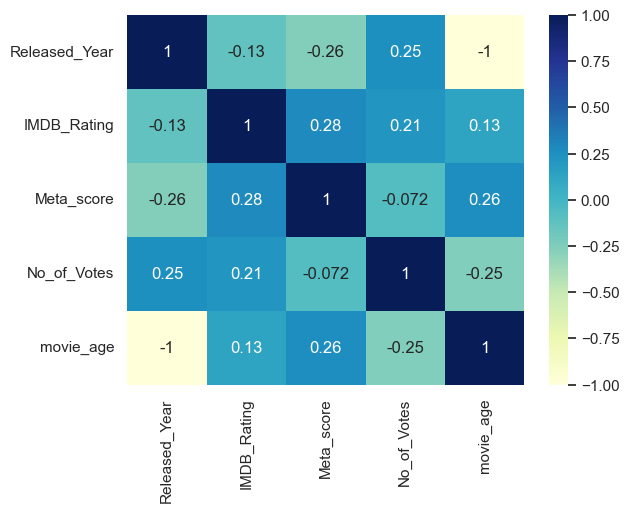

In [71]:
sns.set_theme(style="whitegrid")

sns.heatmap(matrix, cmap="YlGnBu",annot=True)

#### Combining Meta_score and IMDB rating

In [72]:
dataset['Hybrid_Score'] = np.where(
    dataset['Meta_score'].isna(),
    dataset['IMDB_Rating'] * 10,  # Default to IMDb if missing
    (dataset['IMDB_Rating'] * 10 * 0.4 + dataset['Meta_score'] * 0.6)  # Weighted if available
)

In [73]:
dataset[["No_of_Votes","Gross"]]

,No_of_Votes,Gross
0,2343110,"28,341,469"
1,1620367,"134,966,411"
2,2303232,"534,858,444"
3,1129952,"57,300,000"
4,689845,"4,360,000"
...,...,...
995,166544,NaN
996,34075,NaN
997,43374,"30,500,000"
998,26471,NaN


#### Getting the normalized scores

In [74]:
dataset['Gross'] = dataset['Gross'].str.replace(',', '').astype('Int64')

In [75]:
dataset['Gross'] = dataset['Gross'].fillna(0)

In [76]:
dataset['Gross'].isna().sum()

np.int64(0)

In [77]:
# # Normalize both features (0-1 scale)
dataset['Votes_Normalized'] = (dataset['No_of_Votes'] - dataset['No_of_Votes'].min()) / (dataset['No_of_Votes'].max() - dataset['No_of_Votes'].min())
dataset['Gross_Normalized'] = (dataset['Gross'] - dataset['Gross'].min()) / (dataset['Gross'].max() - dataset['Gross'].min())

# Weighted hybrid score (e.g., 60% votes, 40% gross)
dataset['Popularity_Score'] = 0.6 * dataset['Votes_Normalized'] + 0.4 * dataset['Gross_Normalized']

In [78]:
dataset.drop(["Votes_Normalized","Gross_Normalized","No_of_Votes","Gross","Meta_score"],axis=1,inplace=True)

In [79]:
# dataset.drop(["Meta_score"],axis=1,inplace=True)

In [80]:
dataset.isna().sum()

Poster_Link           0
Series_Title          0
Released_Year         0
Certificate         101
Runtime               0
Genre                 0
IMDB_Rating           0
Overview              0
Director              0
Star1                 0
Star2                 0
Star3                 0
Star4                 0
movie_age             0
Hybrid_Score          0
Popularity_Score      0
dtype: int64

#### Counting the number of Genres

In [81]:
dataset["Genre"].value_counts().reset_index().sort_values("count", ascending=False)

,Genre,count
0,Drama,85
1,"Drama, Romance",37
2,"Comedy, Drama",35
3,"Comedy, Drama, Romance",31
4,"Action, Crime, Drama",30
...,...,...
197,"Action, Adventure, Family",1
198,"Action, Crime, Mystery",1
199,"Animation, Drama, Romance",1
200,"Drama, War, Western",1


In [82]:
dataset["Overview_length"] = dataset["Overview"].str.split().str.len()

In [83]:
dataset["Overview"][dataset["Overview_length"]<10]

817    The day-to-day lives of several suburban Los A...
831             The story of the final Emperor of China.
Name: Overview, dtype: object

In [84]:
print("max lenght",dataset["Overview_length"].max())

print("min length",dataset["Overview_length"].min())

max lenght 56
min length 8


In [85]:
dataset[["Certificate","Overview","Genre"]][dataset["Certificate"].isna()]

,Certificate,Overview,Genre
30,NaN,When a ronin requesting seppuku at a feudal lo...,"Action, Drama, Mystery"
54,NaN,"In 1950, amid-st the ravages of the Korean War...","Biography, Drama, History"
77,NaN,An executive of a shoe company becomes a victi...,"Crime, Drama, Mystery"
92,NaN,The family of a left-wing journalist is torn a...,"Drama, Family"
121,NaN,A bureaucrat tries to find a meaning in his li...,Drama
...,...,...,...
920,NaN,A young boy in a remote medieval outpost under...,"Animation, Adventure, Family"
926,NaN,A disaffected soldier returns to his hometown ...,"Crime, Drama, Thriller"
944,NaN,"In the future, the Japanese government capture...","Action, Adventure, Drama"
998,NaN,Several survivors of a torpedoed merchant ship...,"Drama, War"


In [86]:
dataset['combined_Overview'] = dataset['Overview'] + " " + dataset['Genre']

In [87]:
dataset['combined_Overview']

0      Two imprisoned men bond over a number of years...
1      An organized crime dynasty's aging patriarch t...
2      When the menace known as the Joker wreaks havo...
3      The early life and career of Vito Corleone in ...
4      A jury holdout attempts to prevent a miscarria...
                             ...                        
995    A young New York socialite becomes interested ...
996    Sprawling epic covering the life of a Texas ca...
997    In Hawaii in 1941, a private is cruelly punish...
998    Several survivors of a torpedoed merchant ship...
999    A man in London tries to help a counter-espion...
Name: combined_Overview, Length: 1000, dtype: object

In [88]:
dataset.to_csv("modified_dataset.csv")

#### Creating data for classification

In [89]:
classifier_data = dataset[['combined_Overview',"Certificate"]]

In [90]:
classifier_data.drop

<bound method DataFrame.drop of                                      combined_Overview Certificate
0    Two imprisoned men bond over a number of years...           A
1    An organized crime dynasty's aging patriarch t...           A
2    When the menace known as the Joker wreaks havo...          UA
3    The early life and career of Vito Corleone in ...           A
4    A jury holdout attempts to prevent a miscarria...           U
..                                                 ...         ...
995  A young New York socialite becomes interested ...           A
996  Sprawling epic covering the life of a Texas ca...           G
997  In Hawaii in 1941, a private is cruelly punish...      Passed
998  Several survivors of a torpedoed merchant ship...         NaN
999  A man in London tries to help a counter-espion...         NaN

[1000 rows x 2 columns]>

In [91]:
classifier_data.shape

(1000, 2)

In [92]:
classifier_data.dropna(subset="Certificate",inplace=True)

C:\Users\amitt\AppData\Local\Temp\ipykernel_52744\770605886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classifier_data.dropna(subset="Certificate",inplace=True)


In [93]:
classifier_data

,combined_Overview,Certificate
0,Two imprisoned men bond over a number of years...,A
1,An organized crime dynasty's aging patriarch t...,A
2,When the menace known as the Joker wreaks havo...,UA
3,The early life and career of Vito Corleone in ...,A
4,A jury holdout attempts to prevent a miscarria...,U
...,...,...
993,A fashion photographer unknowingly captures a ...,A
994,"Over two ""typical"" days in the life of The Bea...",U
995,A young New York socialite becomes interested ...,A
996,Sprawling epic covering the life of a Texas ca...,G


In [94]:
from transformers import pipeline

RuntimeError: Failed to import transformers.pipelines because of the following error (look up to see its traceback):
Traceback (most recent call last):
  File "C:\Users\amitt\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.